## Nomor 1: Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


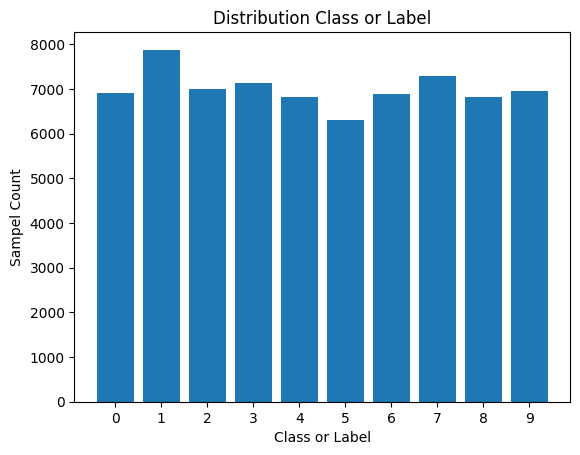

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

unique_labels, label_counts = np.unique(mnist.target, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xlabel('Class or Label')
plt.ylabel('Sampel Count')
plt.title('Distribution Class or Label')
plt.xticks(unique_labels)
plt.show()

### Jumlah data untuk tiap label

In [ ]:
# Menghitung jumlah data untuk setiap label (0-9)
label_counts = np.bincount(mnist.target.astype(int))

# Menampilkan jumlah data untuk setiap label
for i in range(10):
    print(f"Data Count for Label {i}: {label_counts[i]}")

Data Count for Label 0: 6903
Data Count for Label 1: 7877
Data Count for Label 2: 6990
Data Count for Label 3: 7141
Data Count for Label 4: 6824
Data Count for Label 5: 6313
Data Count for Label 6: 6876
Data Count for Label 7: 7293
Data Count for Label 8: 6825
Data Count for Label 9: 6958


## Nomor 2: Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

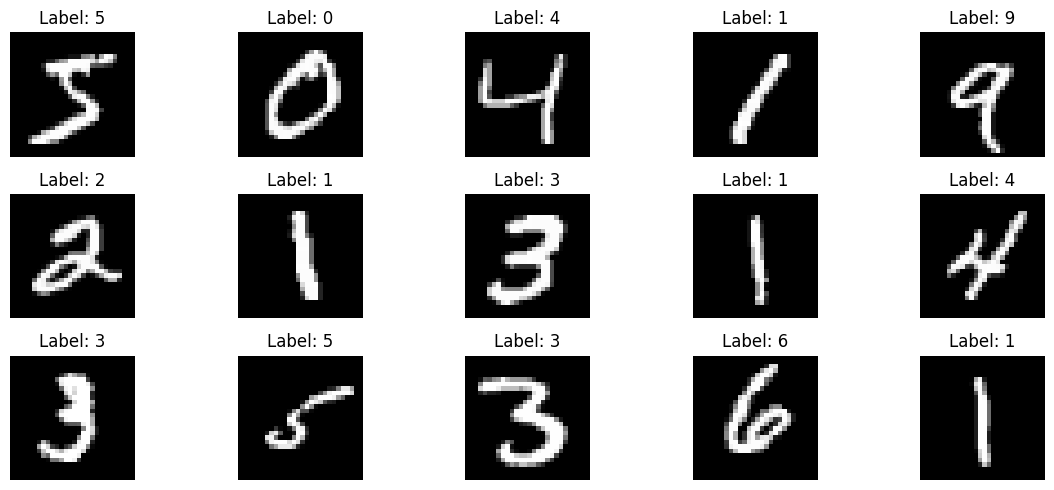

In [ ]:
# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Nomor 3: Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [ ]:
from sklearn.decomposition import PCA

# Menentukan jumlah komponen utama yang diinginkan
n_components = 50  # Misalnya, kita akan menggunakan 50 komponen utama

# Melakukan PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Sekarang, X_pca berisi data yang telah dikurangi dimensinya menggunakan PCA
print("Shape of X_pca:", X_pca.shape)

Shape of X_pca: (70000, 50)


## Nomor 4: Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

### Rasio 70:30

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 70% data pelatihan dan 30% data pengujian
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train1))
print("Data Test Count:", len(X_test1))

Data Train Count: 49000
Data Test Count: 21000


### Rasio 80:20

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 80% data pelatihan dan 20% data pengujian
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train2))
print("Data Test Count:", len(X_test2))

Data Train Count: 56000
Data Test Count: 14000


### Rasio 90:10

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 90% data pelatihan dan 10% data pengujian
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_pca, y, test_size=0.1, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train3))
print("Data Test Count:", len(X_test3))


Data Train Count: 63000
Data Test Count: 7000


## Nomor 5: Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM

### Naive Bayes

#### Rasio 70:30

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Membuat model Naive Bayes Gaussian
nb_model = GaussianNB()

# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train1, y_train1)

# Menguji model pada data pengujian
y_pred_nb1 = nb_model.predict(X_test1)

# Mengukur akurasi model Naive Bayes
accuracy_nb1 = accuracy_score(y_test1, y_pred_nb1)
print("Accuracy Naive Bayes:", accuracy_nb1)


Accuracy Naive Bayes: 0.87


#### Rasio 80:20

In [ ]:
# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train2, y_train2)

# Menguji model pada data pengujian
y_pred_nb2 = nb_model.predict(X_test2)

# Mengukur akurasi model Naive Bayes
accuracy_nb2 = accuracy_score(y_test2, y_pred_nb2)
print("Accuracy Naive Bayes:", accuracy_nb2)


Accuracy Naive Bayes: 0.8714285714285714


#### Rasio 90:10

In [ ]:
# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train3, y_train3)

# Menguji model pada data pengujian
y_pred_nb3 = nb_model.predict(X_test3)

# Mengukur akurasi model Naive Bayes
accuracy_nb3 = accuracy_score(y_test3, y_pred_nb3)
print("Accuracy Naive Bayes:", accuracy_nb3)


Accuracy Naive Bayes: 0.868


### Accuracy, Classification, Confusion Matrix: Data Training

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi model Naive Bayes terhadap data pelatihan
y_train_pred_nb1 = nb_model.predict(X_train1)
accuracy_train_nb1 = accuracy_score(y_train1, y_train_pred_nb1)
print("Accuracy Naive Bayes (Training):", accuracy_train_nb1)

# Classification report Naive Bayes untuk data pelatihan
print("Classification Report Naive Bayes (Training):\n", classification_report(y_train1, y_train_pred_nb1))

# Confusion matrix Naive Bayes untuk data pelatihan
confusion_matrix_nb_train1 = confusion_matrix(y_train1, y_train_pred_nb1)
print("Confusion Matrix Naive Bayes (Training):\n", confusion_matrix_nb_train1)


Accuracy Naive Bayes (Training): 0.8722040816326531
Classification Report Naive Bayes (Training):
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      4845
           1       0.96      0.93      0.95      5513
           2       0.83      0.86      0.84      4857
           3       0.84      0.83      0.84      4965
           4       0.86      0.86      0.86      4888
           5       0.76      0.85      0.80      4398
           6       0.93      0.92      0.92      4788
           7       0.92      0.86      0.89      5045
           8       0.83      0.84      0.84      4833
           9       0.82      0.83      0.83      4868

    accuracy                           0.87     49000
   macro avg       0.87      0.87      0.87     49000
weighted avg       0.87      0.87      0.87     49000

Confusion Matrix Naive Bayes (Training):
 [[4532    0   41   48    3  130   68    7   10    6]
 [   0 5143  106   25    8   85   30   27   75 

### Accuracy, Classification, Confusion Matrix: Data Testing

In [ ]:
# Evaluasi model Naive Bayes terhadap data pengujian
y_test_pred_nb1 = nb_model.predict(X_test1)
accuracy_test_nb1 = accuracy_score(y_test1, y_test_pred_nb1)
print("\nAccuracy Naive Bayes (Testing):", accuracy_test_nb1)

# Classification report Naive Bayes untuk data pengujian
print("Classification Report Naive Bayes (Testing):\n", classification_report(y_test1, y_test_pred_nb1))

# Confusion matrix Naive Bayes untuk data pengujian
confusion_matrix_nb_test1 = confusion_matrix(y_test1, y_test_pred_nb1)
print("Confusion Matrix Naive Bayes (Testing):\n", confusion_matrix_nb_test1)



Accuracy Naive Bayes (Testing): 0.8706666666666667
Classification Report Naive Bayes (Testing):
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2058
           1       0.95      0.95      0.95      2364
           2       0.83      0.85      0.84      2133
           3       0.84      0.83      0.83      2176
           4       0.85      0.85      0.85      1936
           5       0.76      0.83      0.80      1915
           6       0.92      0.92      0.92      2088
           7       0.92      0.87      0.89      2248
           8       0.84      0.83      0.83      1992
           9       0.83      0.84      0.83      2090

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000

Confusion Matrix Naive Bayes (Testing):
 [[1914    0   15   12    4   67   34    5    5    2]
 [   1 2235   38   13    2   31    4   11   27   

## Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

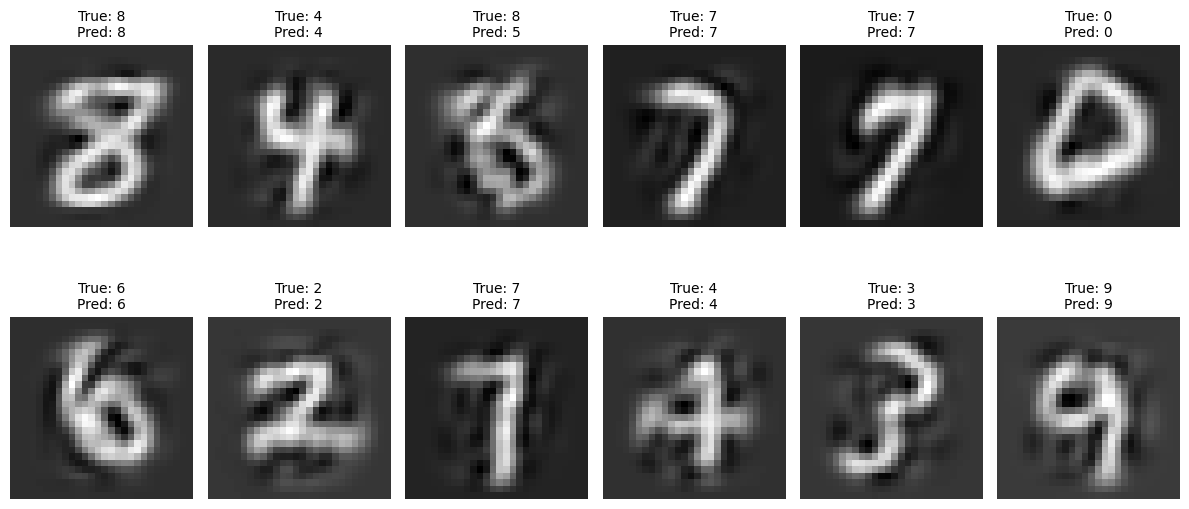

In [ ]:
import matplotlib.pyplot as plt

# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 12

# Mengambil sampel data pengujian dan hasil prediksinya
X_samples = X_test1[:n_samples_to_display]
x_restored = pca.inverse_transform(X_test1)
y_true_samples = y_test1[:n_samples_to_display]
y_pred_samples = y_test_pred_nb1[:n_samples_to_display]

# Menampilkan citra berserta hasil prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(2, 6, i + 1)
    plt.imshow(x_restored[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

#Multinomial

## Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes Multinomial

# Multinomial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Memisahkan fitur (X) dan label (y)
X = mnist.data
y = mnist.target

## Klasifikasi Naive Bayes Multinomial

### Rasio 70:30

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Menyusun pipeline dengan skala dan model Logistic Regression
scaler = MinMaxScaler()
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Menyusun pipeline dengan skala dan model Logistic Regression
pipeline = Pipeline([('scaler', scaler), ('model', model)])

# Melatih model Logistic Regression dengan data yang telah di-scala
pipeline.fit(X_train1, y_train1)

# Menguji model pada data pengujian
y_pred1 = pipeline.predict(X_test1)

# Menghitung akurasi
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Akurasi Model:", accuracy1)

Akurasi Model: 0.9034285714285715


### Rasio 80:20

In [ ]:
# Melatih model Logistic Regression dengan data yang telah di-scala
pipeline.fit(X_train2, y_train2)

# Menguji model pada data pengujian
y_pred2 = pipeline.predict(X_test2)

# Menghitung akurasi
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Akurasi Model:", accuracy2)

Akurasi Model: 0.9042142857142857


### Rasio 90:10

In [ ]:
# Melatih model Logistic Regression dengan data yang telah di-scala
pipeline.fit(X_train3, y_train3)

# Menguji model pada data pengujian
y_pred3 = pipeline.predict(X_test3)

# Menghitung akurasi
accuracy3 = accuracy_score(y_test3, y_pred3)
print("Akurasi Model:", accuracy3)

Akurasi Model: 0.9037142857142857


## Accuracy, Classification, Confusion Matrix: Data Training, dengan akurasi rasio tertinggi

In [ ]:
from sklearn.metrics import confusion_matrix

# Menguji model pada data training
y_train_pred2 = model.predict(X_train2)

# Menghitung akurasi pada data training
accuracy_train2 = accuracy_score(y_train2, y_train_pred2)
print("Akurasi Data Training:", accuracy_train2)

# Menampilkan laporan klasifikasi untuk data training
print("Laporan Klasifikasi Data Training:")
print(classification_report(y_train2, y_train_pred2))

# Menghitung dan menampilkan confusion matrix untuk data pengujian
conf_matrix2 = confusion_matrix(y_test2, y_pred2)
print("Confusion Matrix:")
print(conf_matrix2)
# Pada bagian ini, kita melakukan prediksi pada data training dan menghitung akurasi pada data training. Selanjutnya, kita menampilkan laporan klasifikasi untuk data training. Kemudian, kita menghitung dan menampilkan confusion matrix untuk data pengujian. Confusion matrix akan menunjukkan hasil prediksi yang benar dan salah untuk setiap kelas pada data pengujian.

Akurasi Data Training: 0.8160178571428571
Laporan Klasifikasi Data Training:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      5560
           1       0.64      0.99      0.78      6277
           2       0.94      0.73      0.82      5610
           3       0.87      0.81      0.84      5708
           4       0.78      0.93      0.85      5529
           5       0.92      0.60      0.73      5040
           6       0.86      0.93      0.90      5480
           7       0.80      0.92      0.85      5790
           8       0.96      0.57      0.72      5468
           9       0.89      0.64      0.75      5538

    accuracy                           0.82     56000
   macro avg       0.85      0.81      0.81     56000
weighted avg       0.84      0.82      0.81     56000

Confusion Matrix:
[[1296    1    5    3    1   11   14    3    8    1]
 [   0 1541    4   11    1   11    1    6   21    4]
 [   5   21 1208   18   22    8   27   2

## Accuracy, Classification, Confusion Matrix: Data Testing, dengan akurasi rasio tertinggi

In [ ]:
# Menguji model pada data pengujian
y_test_pred2 = model.predict(X_test2)

# Menghitung akurasi pada data pengujian
accuracy_test2 = accuracy_score(y_test2, y_test_pred2)
print("Akurasi Data Testing:", accuracy_test2)

# Menampilkan laporan klasifikasi untuk data pengujian
print("Laporan Klasifikasi Data Testing:")
print(classification_report(y_test2, y_test_pred2))

# Menghitung dan menampilkan confusion matrix untuk data pengujian
conf_matrix_test2 = confusion_matrix(y_test2, y_test_pred2)
print("Confusion Matrix Data Testing:")
print(conf_matrix_test2)

Akurasi Data Testing: 0.8211428571428572
Laporan Klasifikasi Data Testing:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1343
           1       0.65      0.99      0.79      1600
           2       0.95      0.74      0.83      1380
           3       0.87      0.81      0.84      1433
           4       0.78      0.93      0.85      1295
           5       0.93      0.61      0.73      1273
           6       0.86      0.93      0.89      1396
           7       0.81      0.94      0.87      1503
           8       0.96      0.58      0.73      1357
           9       0.91      0.66      0.76      1420

    accuracy                           0.82     14000
   macro avg       0.85      0.82      0.82     14000
weighted avg       0.85      0.82      0.82     14000

Confusion Matrix Data Testing:
[[1318    1    0    2    2    1   16    2    1    0]
 [   0 1582    3    5    2    1    0    5    1    1]
 [  63  138 1023   16   32   

Tampilkan citra data testing berserta hasil pelabelannya

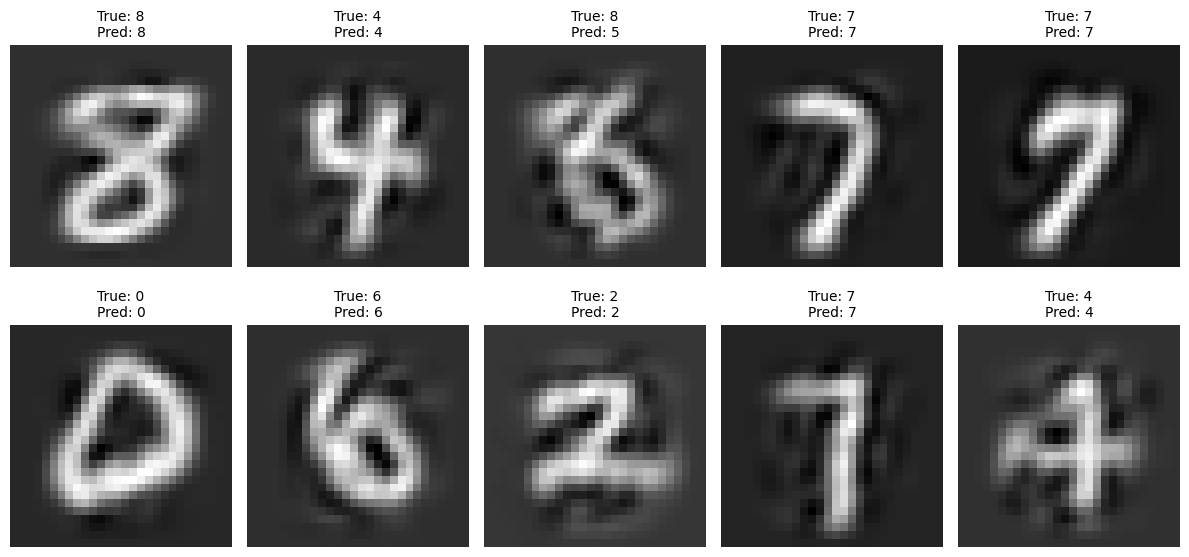

In [ ]:
import matplotlib.pyplot as plt

# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 10

# Mengambil sampel data pengujian dan hasil prediksinya
X_samples = X_test2[:n_samples_to_display]
x_restored = pca.inverse_transform(X_test2)
y_true_samples = y_test2[:n_samples_to_display]
y_pred_samples = y_test_pred2[:n_samples_to_display]

# Menampilkan citra berserta hasil prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_restored[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()